In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [3]:
data_path = 'datasets/'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))
labels, label_dict

([0, 1], {'no': 0, 'yes': 1})

In [4]:
img_size = 224
data = []
label = []

# Load and preprocess images
for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            data.append(resized)
            label.append(label_dict[category])
        except Exception as e:
            print('Exception:', e)

In [5]:
data = np.array(data) / 255.0
data = np.stack((data,) * 3, axis=-1)
label = np.array(label)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# Load VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
train_features = model.predict(x_train)
test_features = model.predict(x_test)

# Flatten features
train_features_flatten = train_features.reshape(train_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

19/19 [==============================] - 61s 3s/step


In [15]:
# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [8]:
# Initialize models
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100)

In [9]:
# Train models
lr_model.fit(train_features_flatten, y_train)
svm_model.fit(train_features_flatten, y_train)
rf_model.fit(train_features_flatten, y_train)

RandomForestClassifier()

In [10]:
# Predict using the models
lr_pred = lr_model.predict(test_features_flatten)
svm_pred = svm_model.predict(test_features_flatten)
rf_pred = rf_model.predict(test_features_flatten)

In [11]:
# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

In [12]:
lr_acc, lr_prec, lr_rec, lr_f1, lr_cm = evaluate_model(y_test, lr_pred)
svm_acc, svm_prec, svm_rec, svm_f1, svm_cm = evaluate_model(y_test, svm_pred)
rf_acc, rf_prec, rf_rec, rf_f1, rf_cm = evaluate_model(y_test, rf_pred)

In [13]:
# Print results
print("Logistic Regression:")
print(f"Accuracy: {lr_acc}, Precision: {lr_prec}, Recall: {lr_rec}, F1 Score: {lr_f1}")
print(f"Confusion Matrix:\n{lr_cm}\n")

print("Support Vector Machine:")
print(f"Accuracy: {svm_acc}, Precision: {svm_prec}, Recall: {svm_rec}, F1 Score: {svm_f1}")
print(f"Confusion Matrix:\n{svm_cm}\n")

print("Random Forest:")
print(f"Accuracy: {rf_acc}, Precision: {rf_prec}, Recall: {rf_rec}, F1 Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_cm}\n")

Logistic Regression:
Accuracy: 0.985, Precision: 0.9793103448275862, Recall: 0.9895470383275261, F1 Score: 0.9844020797227035
Confusion Matrix:
[[307   6]
 [  3 284]]

Support Vector Machine:
Accuracy: 0.9866666666666667, Precision: 0.9826989619377162, Recall: 0.9895470383275261, F1 Score: 0.9861111111111112
Confusion Matrix:
[[308   5]
 [  3 284]]

Random Forest:
Accuracy: 0.9566666666666667, Precision: 0.9453924914675768, Recall: 0.9651567944250871, F1 Score: 0.9551724137931035
Confusion Matrix:
[[297  16]
 [ 10 277]]



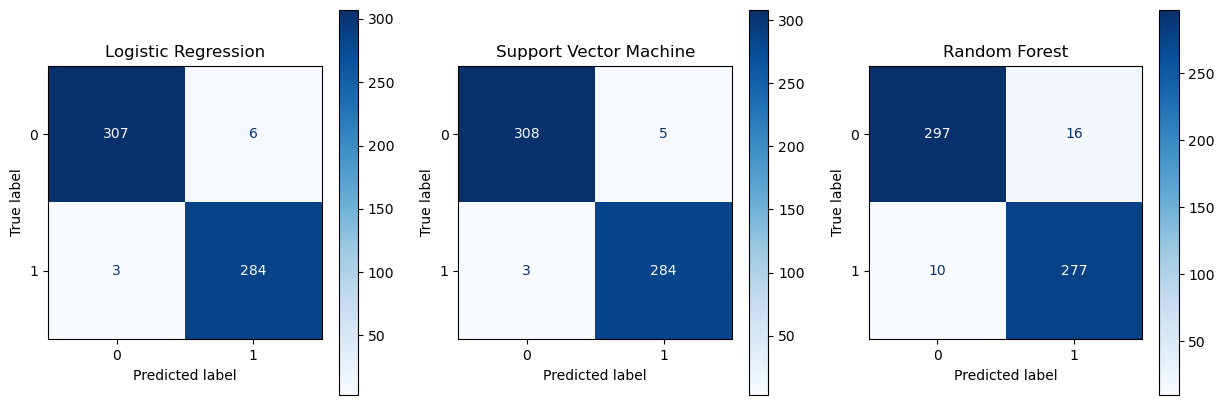

In [16]:
# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ConfusionMatrixDisplay(lr_cm).plot(ax=axs[0], cmap=plt.cm.Blues, values_format='d')
axs[0].set_title('Logistic Regression')

ConfusionMatrixDisplay(svm_cm).plot(ax=axs[1], cmap=plt.cm.Blues, values_format='d')
axs[1].set_title('Support Vector Machine')

ConfusionMatrixDisplay(rf_cm).plot(ax=axs[2], cmap=plt.cm.Blues, values_format='d')
axs[2].set_title('Random Forest')

plt.show()